In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os

from table_utils import *
from matplotlib_chart import *

%reload_ext table_utils
%reload_ext autoreload

benchmark_dir = "../benchmarks"

def values_to_colors(values):
    distinct_vals = list(set(values))
    cmap = matplotlib.cm.viridis
    colors = cmap(np.linspace(0, 1, len(distinct_vals)))
    return [colors[distinct_vals.index(x)] for x in values]

def load_input_table(fname):
    with open(os.path.join(benchmark_dir, fname), "r") as f:
        benchmark = json.load(f)
        input_data = benchmark["input_data"]
        df = pd.DataFrame.from_records(input_data)
        df = load_and_clean_table(df, return_as_df=True)
        return df

   Agree  Disagree  Strongly Agree  Strongly Disagree  index
0     35       8.0              50                  7      0
1     10      10.0              70                 10      1
2     30      15.0              45                 10      2


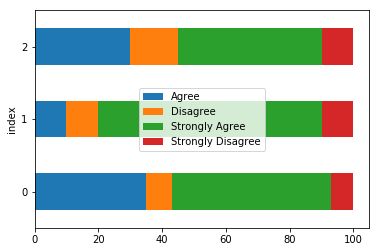

In [2]:
df = load_input_table("007.json")
df["index"] = df.index

#df.plot(kind="barh",x="index", y=["Agree", "Disagree", "Strongly Agree", "Strongly Disagree"], stacked=True)

chart = MatplotlibChart(df, 
            MpGroupBarChart("index", ["Agree", "Disagree", 
                                    "Strongly Agree", 
                                    "Strongly Disagree"], 
                          stacked=True, orient="horizontal"))

print(df)
#pprint(chart.eval())
chart.render()

      Class  Fall  Spring
0  Literacy    34      69
1  Language    63      77
2      Math    67      75
3   Science    92      98
4      Arts    96     100


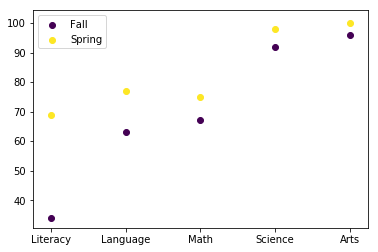

In [3]:
df = load_input_table("010.json")

# plt.scatter(y=df["Class"],x=df["Fall"], label="Fall")
# plt.scatter(y=df["Class"],x=df["Spring"], label="Spring")
# plt.legend()
# plt.show()

chart = MatplotlibChart(df, MpScatterPlot(c_x="Class", c_ys=["Fall", "Spring"]))

print(df)
#pprint(chart.eval())
chart.render()

    Month  Net Cash Flow  index  Net Cash Flow Sum       c      d
0   Start          80000      0              80000       0  False
1     Apr          -5003      1              74997   80000   True
2     May         -16700      2              58297   74997   True
3     Jun          48802      3             107099   58297  False
4     Jul         -11198      4              95901  107099   True
5     Aug         -35260      5              60641   95901   True
6     Sep          18220      6              78861   60641  False
7     Oct         -23840      7              55021   78861   True
8     Nov          43250      8              98271   55021  False
9     Dec         -18280      9              79991   98271   True
10    Jan          26670     10             106661   79991  False
11    Feb          15000     11             121661  106661  False
12    Mar          24750     12             146411  121661  False


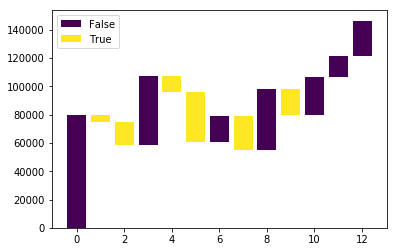

In [5]:
df = load_input_table("003.json")
df["index"] = df.index
tmp = df["Net Cash Flow"].cumsum()
df = df.join(tmp, lsuffix='', rsuffix=' Sum')
df = df.assign(c=df["Net Cash Flow Sum"]-df["Net Cash Flow"])
df = df.assign(d=df["c"]>df["Net Cash Flow Sum"])

#plt.bar(x=df["Month"], height=df["Net Cash Flow"], bottom=df["c"], color=values_to_colors(df["d"]))
chart = MatplotlibChart(df, MpBarChart(c_x="index", c_height="Net Cash Flow", c_bot="c", c_color="d"))

print(df)
#pprint(chart.eval())
chart.render()

    Duration End of Shift  Period  Shift Start of Shift    s0    s1
0         60   110 / 1090       1      1      50 / 1150    50   110
1         48    272 / 928       1      2      224 / 976   224   272
2         40    419 / 781       1      3      379 / 821   379   419
3         56    601 / 599       1      4      545 / 655   545   601
4         81    840 / 360       1      5      759 / 441   759   840
5         48   1014 / 186       1      6      966 / 234   966  1014
6         62    1146 / 54       1      7     1084 / 116  1084  1146
7         60    60 / 1140       2      8       0 / 1200     0    60
8         88    245 / 955       2      9     157 / 1043   157   245
9         46    604 / 596       2     10      558 / 642   558   604
10        66    767 / 433       2     11      701 / 499   701   767
11        83    913 / 287       2     12      830 / 370   830   913
12        83    1140 / 60       2     13     1057 / 143  1057  1140
13        37    76 / 1124       3     14      39

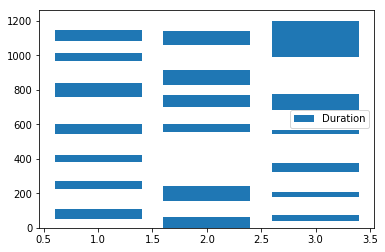

In [6]:
df = load_input_table("015.json")

split_col = df["End of Shift"].str.split("/", expand=True)
df["s1"] = split_col[0]
split_col = df["Start of Shift"].str.split("/", expand=True)
df["s0"] = split_col[0]

df = pd.DataFrame.from_records(load_and_clean_table(df))

#plt.bar(x=df["Period"], height=df["Duration"], bottom=df["s0"])
chart = MatplotlibChart(df, MpBarChart(c_x="Period", c_height="Duration", c_bot="s0"))

print(df)
#pprint(chart.eval())
chart.render()

Item variable  Desktop Computers  Laptops  Monitors  Printers
0        2012                 20       34        12        78
1        2013                 12       45        10        13
2        2014                 13       40        17        90
3        2015                 12       39        15        14


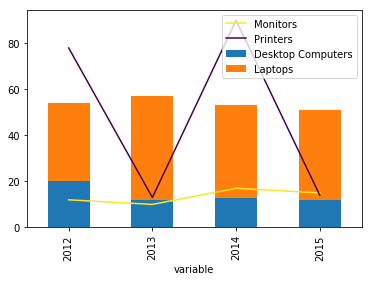

In [6]:
df = load_input_table("018.json")

df = pd.melt(df, id_vars='Item', value_vars=["2012", "2013", "2014", "2015"])
df = df.pivot_table(index="variable", columns="Item", values=['value'])
df.columns = df.columns.droplevel(0)
df = df.reset_index()

print(df)
# fig, ax = plt.subplots()
# for col in ["Monitors", "Printers"]:
#     ax.plot(df["variable"], df[col], label=col)
# df.plot.bar(x="variable", y=["Desktop Computers", "Laptops"], stacked=True, ax=ax)
# ax.legend()

chart = MatplotlibChart(df, MultiLayer(
            charts=[
                GroupBarChart(c_x="variable", c_ys=["Desktop Computers", "Laptops"], stacked=True),
                LineChart(c_x="variable", c_ys=["Monitors", "Printers"])
            ]))
chart.render()

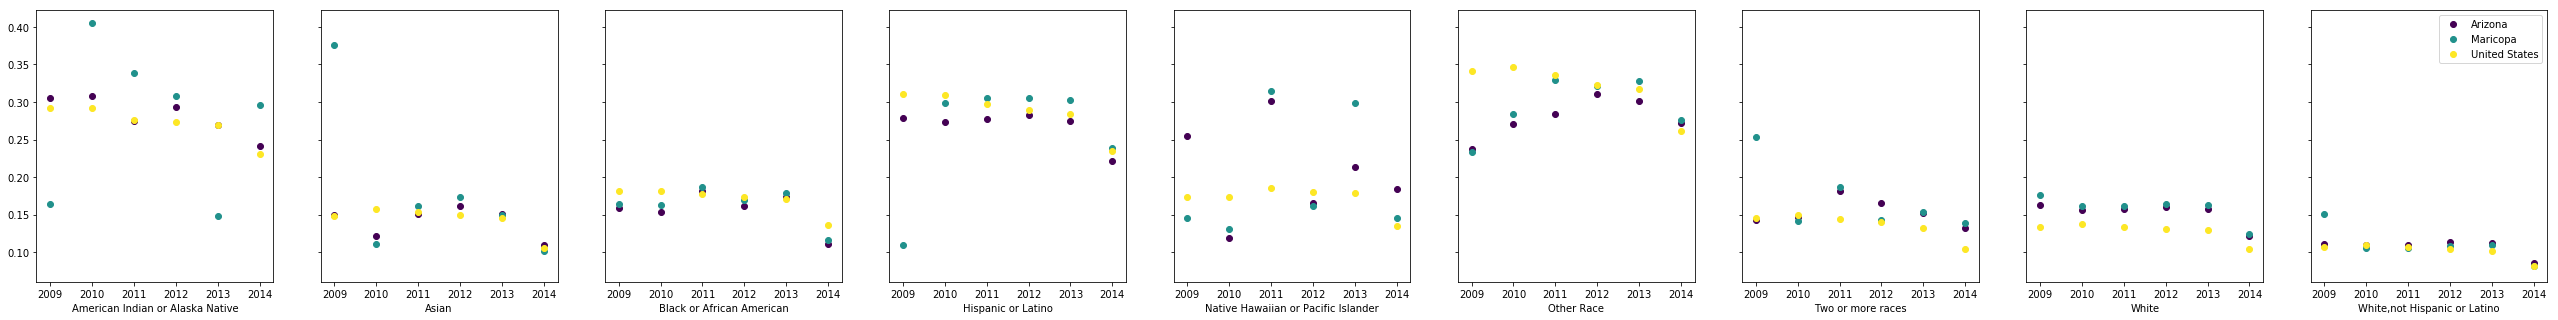

In [7]:
df = load_input_table("009.json")
df = pd.melt(df, id_vars=['Location', 'Rae'], value_vars=["2009", "2010", "2011", "2012", "2013", "2014"])
df = df.pivot_table(index=["variable", "Rae"], columns="Location", values=['value']).reset_index()
df.columns = [col[-1] if col[-1] != "" else col[0] for col in df.columns.values]

chart = MatplotlibChart(df, Subplot(
            chart=ScatterPlot(c_x="variable", c_ys=["Arizona", "Maricopa", "United States"]),
            column="Rae"))
#print(df)
#pprint(chart.eval())
chart.render()

         variable        C2    Q1    Q2    Q3
0            APAC   Adopted  0.38  0.27  0.59
1            APAC   Engaged  0.47  0.37  0.75
2            APAC   Pitched  0.45  0.35  0.74
3            APAC  Targeted  0.48  0.39  0.87
4            EMEA   Adopted  0.52  0.42  0.62
5            EMEA   Engaged  0.65  0.54  0.78
6            EMEA   Pitched  0.59  0.50  0.72
7            EMEA  Targeted  0.66  0.56  0.91
8           LATAM   Adopted  0.31  0.26  0.53
9           LATAM   Engaged  0.48  0.41  0.80
10          LATAM   Pitched  0.44  0.37  0.73
11          LATAM  Targeted  0.48  0.43  0.95
12  North America   Adopted  0.36  0.31  0.40
13  North America   Engaged  0.52  0.43  0.55
14  North America   Pitched  0.45  0.39  0.50
15  North America  Targeted  0.56  0.50  0.70


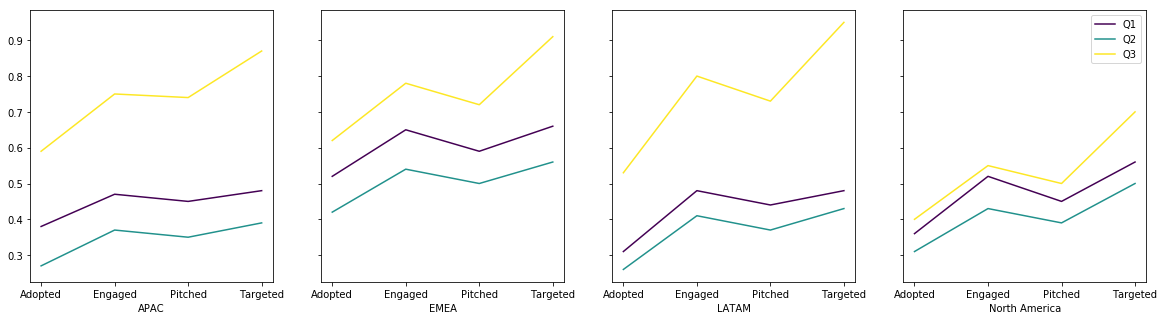

In [8]:
df = load_input_table("012.json")
df = pd.melt(df, id_vars=["C1", "C2"], value_vars=["EMEA", "LATAM", "North America", "APAC"])
df = df.pivot_table(index=["variable", "C2"], columns="C1", values=['value']).reset_index()
df.columns = [col[-1] if col[-1] != "" else col[0] for col in df.columns.values]

print(df)

# group = df["variable"]
# num_group = len(np.unique(group))
# fig, axes = plt.subplots(1,num_group,figsize=(num_group * 5,5),sharex=True, sharey=True)
# for ax,g in zip(axes, np.unique(group)):
#     i = np.where(group == g)
#     sub_df = df.loc[i]
#     for col in ["Q1", "Q2", "Q3"]:
#         ax.plot(sub_df["C2"], sub_df[col], label=col)
#         ax.set_xlabel(g)
# plt.legend()
# plt.show()

chart = MatplotlibChart(df, Subplot(
            chart=LineChart(c_x="C2", c_ys=["Q1", "Q2", "Q3"]),
            column="variable"))
#pprint(chart.eval())
chart.render()

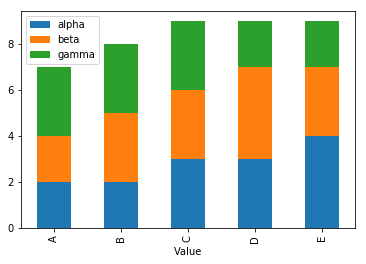

In [9]:
df = load_input_table("013.json")

chart = MatplotlibChart(df, GroupBarChart("Value", ["alpha", "beta", "gamma"], stacked=True))
#df.plot(kind="bar", x="Value", y=["alpha", "beta", "gamma"], stacked=True)

chart.render()

    Duration  End of Shift  Period  Shift Start of Shift    s0    s1
0         60  1:50 / 18:10       1      1   0:50 / 19:10    50   110
1         48  4:32 / 15:28       1      2   3:44 / 16:16   224   272
2         40  6:59 / 13:01       1      3   6:19 / 13:41   379   419
3         56  10:01 / 9:59       1      4   9:05 / 10:55   545   601
4         81  14:00 / 6:00       1      5   12:39 / 7:21   759   840
5         48  16:54 / 3:06       1      6   16:06 / 3:54   966  1014
6         62  19:06 / 0:54       1      7   18:04 / 1:56  1084  1146
7         60  1:00 / 19:00       2      8   0:00 / 20:00     0    60
8         88  4:05 / 15:55       2      9   2:37 / 17:23   157   245
9         46  10:04 / 9:56       2     10   9:18 / 10:42   558   604
10        66  12:47 / 7:13       2     11   11:41 / 8:19   701   767
11        83  15:13 / 4:47       2     12   13:50 / 6:10   830   913
12        83  19:00 / 1:00       2     13   17:37 / 2:23  1057  1140
13        37  1:16 / 18:44       3

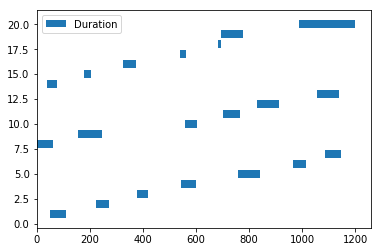

In [10]:
df = load_input_table("014.json")

split_col = df["End of Shift"].str.split("/", expand=True)
df["s1"] = split_col[0]
split_col = df["Start of Shift"].str.split("/", expand=True)
df["s0"] = split_col[0]

df = pd.DataFrame.from_records(load_and_clean_table(df))

#plt.barh(y=df["Shift"], width=df["Duration"], left=df["s0"])
chart = MatplotlibChart(df, BarChart(c_x="Shift", c_height="Duration", 
                                     c_bot="s0", orient="horizontal"))

print(df)
pprint(chart.eval())
chart.render()

   lower range  means  stddev  upper range variable
0         0.39   0.52  0.1328         0.66       Y1
1         0.44   0.57  0.1321         0.70       Y2
2         0.47   0.60  0.1303         0.73       Y3
3         0.50   0.63  0.1266         0.75       Y4
4         0.51   0.63  0.1225         0.75       Y5


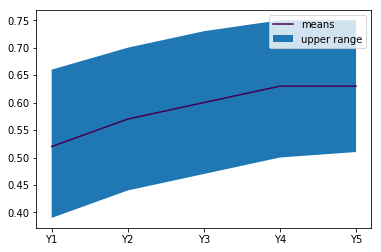

In [11]:
df = load_input_table("008.json")

# gather(dat, "col1", "col2", -Value) %>% spread(Value, col2)
df = pd.melt(df, id_vars='Value', value_vars=["Y1", "Y2", "Y3", "Y4", "Y5"])
df = df.pivot(index='variable',columns='Value', values='value').reset_index()
df = pd.DataFrame.from_records(load_and_clean_table(df))

print(df)
chart = MatplotlibChart(df, MultiLayer(
            charts=[
                AreaChart(c_x="variable", c_tops=["upper range"], c_bots=["lower range"]),
                LineChart(c_x="variable", c_ys=["means"])]))
chart.render()

    Year    loc  Bisc  Choc
0   2007  NORTH   6.0  14.0
1   2007  SOUTH   4.0  10.0
2   2007   WEST   4.0   6.0
3   2008  NORTH   6.7  18.0
4   2008  SOUTH   5.0  11.0
5   2008   WEST   5.0  10.0
6   2009  NORTH   7.0  19.0
7   2009  SOUTH   5.7  14.0
8   2009   WEST   5.7  12.0
9   2010  NORTH   8.0  21.0
10  2010  SOUTH   6.0  16.0
11  2010   WEST   6.0  15.0


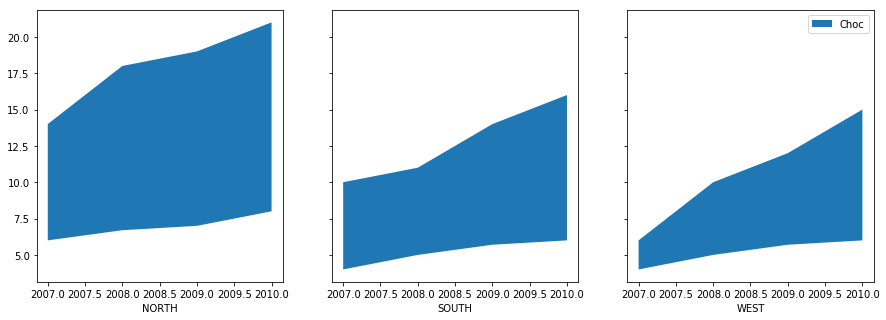

In [12]:
df = load_input_table("039.json")

df = pd.melt(df, id_vars=["Year"], 
               value_vars=["NORTH-Bisc", "NORTH-Choc", "SOUTH-Bisc", "SOUTH-Choc", "WEST-Bisc", "WEST-Choc"])
split_col = df["variable"].str.split("-", expand=True)
df["loc"] = split_col[0]
df["type"] = split_col[1]
df = df.pivot_table(index=["Year", "loc"], columns='type', values=['value']).reset_index()
df.columns = ["Year", "loc", "Bisc", "Choc"]

print(df)

chart = MatplotlibChart(df, Subplot(
            chart=AreaChart(c_x="Year", c_bots=["Bisc"], c_tops=["Choc"]),
            column="loc"))

# chart = MatplotlibChart(df, MultiLayer(
#             charts=[
#                 AreaChart(c_x="variable", c_top="upper range", c_bot="lower range"),
#                 LineChart(c_x="variable", c_ys=["means"])]))
chart.render()

In [8]:
df = load_input_table("036.json")
df["VolumeDiff"] = df["Volume"].diff()
df = pd.melt(df, id_vars=["Close", "Date"], value_vars=["VolumeDiff", "Volume"])
df["color"] = np.array(list(map(lambda x: "pos" if x > 0 else "neg", df['value'])))
df["value"] = df["value"].abs()

df = df.pivot_table(index=["Date", "variable"], columns="color", values=['value']).reset_index()
df.columns = [col[-1] if col[-1] != "" else col[0] for col in df.columns.values]

display(df)

chart = MatplotlibChart(df, MpSubplot(
            chart=MpAreaChart(c_x="Date", c_tops=["pos", "neg"]),
            column="variable"))

#print(chart.eval())

Date    variable     neg      pos
0      1-Apr-13      Volume     NaN   8100.0
1      1-Apr-13  VolumeDiff  4800.0      NaN
2      1-Aug-05      Volume     NaN  20500.0
3      1-Aug-05  VolumeDiff     NaN   2400.0
4      1-Aug-11      Volume     NaN  13000.0
5      1-Aug-11  VolumeDiff  3200.0      NaN
6      1-Dec-08      Volume     NaN  49300.0
7      1-Dec-08  VolumeDiff     NaN   8300.0
8      1-Dec-14      Volume     NaN   9500.0
9      1-Dec-14  VolumeDiff  1600.0      NaN
10     1-Feb-10      Volume     NaN  19100.0
11     1-Feb-10  VolumeDiff  3100.0      NaN
12     1-Jul-05      Volume     NaN  12600.0
13     1-Jul-13      Volume     NaN   9400.0
14     1-Jul-13  VolumeDiff  1600.0      NaN
15     1-Jun-09      Volume     NaN  41400.0
16     1-Jun-09  VolumeDiff   600.0      NaN
17     1-Jun-15      Volume     NaN  12300.0
18     1-Jun-15  VolumeDiff     NaN   3200.0
19     1-Nov-10      Volume     NaN   9300.0
20     1-Nov-10  VolumeDiff  2700.0      NaN
21     1-Oct-07      Volume     NaN  23900.0
22     1-Oct-07  VolumeDiff     NaN   4300.0
23     1-Oct-12      Volume     NaN  16900.0
24     1-Oct-12  VolumeDiff     NaN   5400.0
25     1-Sep-08      Volume     NaN  20800.0
26     1-Sep-08  VolumeDiff     NaN    300.0
27     1-Sep-14      Volume     NaN   8200.0
28     1-Sep-14  VolumeDiff     0.0      NaN
29    10-Apr-06      Volume     NaN  27200.0
...         ...         ...     ...      ...
1023   9-Aug-10      Volume     NaN  17400.0
1024   9-Aug-10  VolumeDiff     NaN   6200.0
1025   9-Dec-13      Volume     NaN  11900.0
1026   9-Dec-13  VolumeDiff     NaN    800.0
1027   9-Feb-09      Volume     NaN  33200.0
1028   9-Feb-09  VolumeDiff  3800.0      NaN
1029   9-Feb-15      Volume     NaN  14300.0
1030   9-Feb-15  VolumeDiff   600.0      NaN
1031   9-Jan-06      Volume     NaN  20300.0
1032   9-Jan-06  VolumeDiff     NaN   3600.0
1033   9-Jan-12      Volume     NaN  16600.0
1034   9-Jan-12  VolumeDiff   700.0      NaN
1035   9-Jul-07      Volume     NaN  17000.0
1036   9-Jul-07  VolumeDiff     NaN   2600.0
1037   9-Jul-12      Volume     NaN   8600.0
1038   9-Jul-12  VolumeDiff   200.0      NaN
1039   9-Jun-08      Volume     NaN  26100.0
1040   9-Jun-08  VolumeDiff     NaN   4200.0
1041   9-Jun-14      Volume     NaN  13500.0
1042   9-Jun-14  VolumeDiff  3600.0      NaN
1043   9-Mar-09      Volume     NaN  37300.0
1044   9-Mar-09  VolumeDiff  4600.0      NaN
1045   9-Mar-15      Volume     NaN  11600.0
1046   9-Mar-15  VolumeDiff     NaN    100.0
1047   9-May-11      Volume     NaN  11000.0
1048   9-May-11  VolumeDiff  5100.0      NaN
1049   9-Nov-09      Volume     NaN  24400.0
1050   9-Nov-09  VolumeDiff  6800.0      NaN
1051   9-Oct-06      Volume     NaN  13200.0
1052   9-Oct-06  VolumeDiff     NaN    700.0

[1053 rows x 4 columns]